<a href="https://colab.research.google.com/github/kayamel/Ders_Notlari/blob/master/Cancer_breast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Meme kanseri hastalarından oluşan bu veri seti, nüfus temelli kanser istatistikleri hakkında bilgi sağlayan NCI SEER Programının 2017 Kasım güncellemesinden elde edilmiştir. Veri kümesi 2006-2010 yılları arasında tanı konmuş infiltre duktus ve lobüler karsinom meme kanseri (SEER primer cites recode NOS histoloji kodları 8522/3) olan kadın hastaları içermektedir. Tümör boyutu bilinmeyen, bölgesel LN'leri incelenen, bölgesel LN'leri pozitif olan ve sağkalım ayları 1 aydan az olan hastalar hariç tutulmuştur; böylece sonuçta 4024 hasta dahil edilmiştir.

 Meme kanserinin erken teşhisi çok önemlidir ve hayatta kalma şansını artırmaya yardımcı olabilir. Kadınlar, göğüslerindeki herhangi bir değişikliği tespit etmek için düzenli olarak mamografi çektirmeli ve kendi kendilerini muayene etmelidir.

 2020 yılında Amerika Birleşik Devletleri'ndeki kadınlarda tahmini olarak 276.480 yeni invaziv meme kanseri vakası ve 48.530 yeni non-invaziv (in situ) meme kanseri vakası teşhis edilmiştir. Yaklaşık 42.170 kadının 2020 yılında bu hastalıktan öleceği tahmin edilmektedir. Ayrıca meme kanseri, kadınlardaki tüm kanser ölümlerinin %15'ini oluşturmaktadır. En sık kadınlarda görülmesine rağmen, erkekler de meme kanserine yakalanabilir. 2020 yılında Amerika Birleşik Devletleri'nde erkeklerde tahmini 2.620 yeni invaziv meme kanseri vakası ve 500 yeni non-invaziv (in situ) meme kanseri vakası teşhis edilmiştir. Tahminen 520 erkek bu hastalıktan ölmüştür.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,recall_score
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("/content/Breast_Cancer.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [5]:
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


**EDA**

In [6]:
df.shape

(4024, 16)

In [7]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [8]:
df.columns=df.columns.str.lower().str.replace(" ","_")
df.columns

Index(['age', 'race', 'marital_status', 't_stage_', 'n_stage', '6th_stage',
       'differentiate', 'grade', 'a_stage', 'tumor_size', 'estrogen_status',
       'progesterone_status', 'regional_node_examined',
       'reginol_node_positive', 'survival_months', 'status'],
      dtype='object')

## tüm sutun adlarını küçük harflere dönüştürüp boşlukların yerine _ ekledim.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     4024 non-null   int64 
 1   race                    4024 non-null   object
 2   marital_status          4024 non-null   object
 3   t_stage_                4024 non-null   object
 4   n_stage                 4024 non-null   object
 5   6th_stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   grade                   4024 non-null   object
 8   a_stage                 4024 non-null   object
 9   tumor_size              4024 non-null   int64 
 10  estrogen_status         4024 non-null   object
 11  progesterone_status     4024 non-null   object
 12  regional_node_examined  4024 non-null   int64 
 13  reginol_node_positive   4024 non-null   int64 
 14  survival_months         4024 non-null   int64 
 15  stat

# Verisetimizde eksik değer yok,5 sayısal ve 11 kategorik değişkenden oluşmaktadır

In [10]:
df.describe([0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,10%,25%,35%,50%,65%,75%,90%,95%,max
age,4024.0,53.972167,8.963134,30.0,42.0,47.0,50.00,54.0,59.0,61.0,66.0,68.0,69.0
tumor_size,4024.0,30.473658,21.119696,1.0,12.0,16.0,19.05,25.0,30.0,38.0,60.0,75.0,140.0
regional_node_examined,4024.0,14.357107,8.099675,1.0,4.0,9.0,11.00,14.0,17.0,19.0,25.0,28.0,61.0
reginol_node_positive,4024.0,4.158052,5.109331,1.0,1.0,1.0,1.00,2.0,3.0,5.0,10.0,15.0,46.0
survival_months,4024.0,71.297962,22.921430,1.0,44.0,56.0,63.00,73.0,83.0,90.0,100.0,103.0,107.0


In [11]:
df.describe(include="object").T

,count,unique,top,freq
race,4024,3,White,3413
marital_status,4024,5,Married,2643
t_stage_,4024,4,T2,1786
n_stage,4024,3,N1,2732
6th_stage,4024,5,IIA,1305
differentiate,4024,4,Moderately differentiated,2351
grade,4024,4,2,2351
a_stage,4024,2,Regional,3932
estrogen_status,4024,2,Positive,3755
progesterone_status,4024,2,Positive,3326


In [12]:
df.nunique()

,0
age,40
race,3
marital_status,5
t_stage_,4
n_stage,3
6th_stage,5
differentiate,4
grade,4
a_stage,2
tumor_size,110


# her bir öznitelik için benzersiz değer sayılarına erişmiş olduk


# hepsini bir fonksiyon aracılığıyla çağıralım;

In [13]:
def summary(data):
    print("******shape******")
    print(data.shape)
    print("******columns******")
    print(data.columns)
    print("******information data******")
    print(data.info())
    print("******missing values******")
    print(data.isna().sum())
    print("******Quantiles*****")
    print(data.describe([0.15,0.25,0.35,0.5,0.65,0.75,0.9]).T)
    print("*********nunique********")
    print(data.nunique())

In [14]:
summary(df)

******shape******
(4024, 16)
******columns******
Index(['age', 'race', 'marital_status', 't_stage_', 'n_stage', '6th_stage',
       'differentiate', 'grade', 'a_stage', 'tumor_size', 'estrogen_status',
       'progesterone_status', 'regional_node_examined',
       'reginol_node_positive', 'survival_months', 'status'],
      dtype='object')
******information data******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     4024 non-null   int64 
 1   race                    4024 non-null   object
 2   marital_status          4024 non-null   object
 3   t_stage_                4024 non-null   object
 4   n_stage                 4024 non-null   object
 5   6th_stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   grade                   4024 non-null   object
 8

In [15]:
for i in df.select_dtypes("object").columns.to_list():
    print(df[i].value_counts())
    print("*"*36)

race
White    3413
Other     320
Black     291
Name: count, dtype: int64
************************************
marital_status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64
************************************
t_stage_
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64
************************************
n_stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64
************************************
6th_stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64
************************************
differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64
************************************
grade
2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: count, dtype: int64

In [16]:
df.sort_values("tumor_size",ascending=False).head(20)

,age,race,marital_status,t_stage_,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,reginol_node_positive,survival_months,status
740,49,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,140,Positive,Positive,14,2,48,Alive
3965,47,White,Married,T3,N2,IIIA,Well differentiated,1,Regional,140,Positive,Positive,23,7,64,Alive
1512,63,White,Married,T4,N2,IIIB,Moderately differentiated,2,Regional,140,Positive,Positive,9,8,89,Alive
289,41,White,Married,T3,N3,IIIC,Poorly differentiated,3,Regional,140,Positive,Positive,41,15,51,Dead
1007,60,White,Divorced,T3,N2,IIIA,Moderately differentiated,2,Regional,140,Positive,Positive,21,5,57,Alive
894,47,White,Married,T3,N2,IIIA,Well differentiated,1,Regional,133,Positive,Positive,26,4,58,Alive
305,57,Black,Divorced,T3,N3,IIIC,Poorly differentiated,3,Regional,130,Negative,Positive,10,10,37,Dead
2339,69,White,Single,T4,N3,IIIC,Poorly differentiated,3,Regional,130,Positive,Positive,12,12,25,Dead
70,49,White,Married,T3,N2,IIIA,Poorly differentiated,3,Regional,130,Positive,Negative,12,8,104,Alive
526,45,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,130,Positive,Positive,44,3,80,Alive


In [17]:
df.sort_values("tumor_size",ascending=True).head(20)

,age,race,marital_status,t_stage_,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,reginol_node_positive,survival_months,status
627,61,Black,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Positive,4,1,51,Alive
2435,45,Black,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Positive,8,1,72,Alive
1689,43,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Positive,12,1,106,Alive
1470,65,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Positive,6,1,81,Alive
536,55,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Negative,18,1,87,Alive
1107,58,White,Married,T1,N3,IIIC,Poorly differentiated,3,Regional,1,Positive,Positive,22,22,82,Dead
761,55,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Positive,31,1,59,Alive
2818,52,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,2,Positive,Positive,4,1,94,Alive
2383,65,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,2,Positive,Negative,10,1,32,Dead
986,66,Black,Married,T1,N1,IIA,Moderately differentiated,2,Regional,2,Negative,Negative,2,1,96,Alive


In [18]:
df.groupby("marital_status").describe().T

marital_status                  Divorced      Married   Separated     Single   \
age                    count  486.000000  2643.000000   45.000000  615.000000   
                       mean    55.131687    53.639803   51.533333   51.778862   
                       std      8.342609     8.843519    7.881509    9.169764   
                       min     30.000000    30.000000   37.000000   30.000000   
                       25%     49.000000    47.000000   46.000000   46.000000   
                       50%     56.000000    54.000000   53.000000   51.000000   
                       75%     61.000000    61.000000   57.000000   59.000000   
                       max     69.000000    69.000000   67.000000   69.000000   
tumor_size             count  486.000000  2643.000000   45.000000  615.000000   
                       mean    31.644033    30.045403   30.222222   31.243902   
                       std     21.997442    21.204142   19.866473   20.200357   
                       min      3.000000     1.000000    2.000000    2.000000   
                       25%     17.000000    15.000000   19.000000   18.000000   
                       50%     25.000000    24.000000   25.000000   25.000000   
                       75%     38.000000    37.000000   40.000000   40.000000   
                       max    140.000000   140.000000   90.000000  130.000000   
regional_node_examined count  486.000000  2643.000000   45.000000  615.000000   
                       mean    14.693416    14.299281   14.911111   14.200000   
                       std      8.514792     7.973894    9.493592    7.948163   
                       min      1.000000     1.000000    1.000000    1.000000   
                       25%      9.000000     9.000000   10.000000    9.000000   
                       50%     14.000000    14.000000   16.000000   14.000000   
                       75%     19.000000    19.000000   20.000000   19.000000   
                       max     61.000000    60.000000   46.000000   51.000000   
reginol_node_positive  count  486.000000  2643.000000   45.000000  615.000000   
                       mean     4.654321     4.001135    6.444444    4.069919   
                       std      5.715944     4.943856    7.738791    4.804652   
                       min      1.000000     1.000000    1.000000    1.000000   
                       25%      1.000000     1.000000    1.000000    1.000000   
                       50%      2.000000     2.000000    3.000000    2.000000   
                       75%      5.000000     5.000000    9.000000    5.000000   
                       max     37.000000    46.000000   35.000000   41.000000   
survival_months        count  486.000000  2643.000000   45.000000  615.000000   
                       mean    70.520576    71.979569   61.911111   70.422764   
                       std     23.515088    22.314920   25.629193   24.023810   
                       min      2.000000     1.000000    4.000000    3.000000   
                       25%     58.000000    56.000000   48.000000   56.000000   
                       50%     72.000000    74.000000   67.000000   71.000000   
                       75%     88.000000    90.000000   81.000000   90.000000   
                       max    107.000000   107.000000  100.000000  107.000000   

marital_status                   Widowed  
age                    count  235.000000  
                       mean    61.519149  
                       std      6.825250  
                       min     37.000000  
                       25%     58.000000  
                       50%     63.000000  
                       75%     67.000000  
                       max     69.000000  
tumor_size             count  235.000000  
                       mean    30.902128  
                       std     20.917292  
                       min      2.000000  
                       25%     17.000000  
                       50%     25.000000  
                       75%     40

In [19]:
df.groupby("status").describe().T

status                              Alive        Dead
age                    count  3408.000000  616.000000
                       mean     53.759096   55.150974
                       std       8.808420    9.698291
                       min      30.000000   30.000000
                       25%      47.000000   48.000000
                       50%      54.000000   56.500000
                       75%      61.000000   63.000000
                       max      69.000000   69.000000
tumor_size             count  3408.000000  616.000000
                       mean     29.268779   37.139610
                       std      20.303175   24.116115
                       min       1.000000    1.000000
                       25%      15.000000   20.000000
                       50%      23.000000   30.000000
                       75%      35.000000   50.000000
                       max     140.000000  140.000000
regional_node_examined count  3408.000000  616.000000
                       mean     14.237383   15.019481
                       std       8.023208    8.486600
                       min       1.000000    1.000000
                       25%       9.000000    9.000000
                       50%      14.000000   14.000000
                       75%      19.000000   20.000000
                       max      61.000000   57.000000
reginol_node_positive  count  3408.000000  616.000000
                       mean      3.600646    7.241883
                       std       4.375180    7.312642
                       min       1.000000    1.000000
                       25%       1.000000    2.000000
                       50%       2.000000    4.000000
                       75%       4.000000   10.000000
                       max      41.000000   46.000000
survival_months        count  3408.000000  616.000000
                       mean     75.941021   45.610390
                       std      19.386459   23.966253
                       min       1.000000    2.000000
                       25%      61.000000   27.000000
                       50%      77.000000   44.000000
                       75%      92.000000   61.000000
                       max     107.000000  102.000000

# ölenlerin yaş ortalaması 55,en genç ölen 30 yaşında


**Data Visualize**


# kategorik ve sayısal öznitelikler için listelerimizi oluşturalım;

In [20]:
cat_list=[i for i in df.select_dtypes("object")]
num_list=[i for i in df.select_dtypes(include=["int64","float64"])]

In [21]:
num_list

['age',
 'tumor_size',
 'regional_node_examined',
 'reginol_node_positive',
 'survival_months']

In [22]:
cat_list

['race',
 'marital_status',
 't_stage_',
 'n_stage',
 '6th_stage',
 'differentiate',
 'grade',
 'a_stage',
 'estrogen_status',
 'progesterone_status',
 'status']

# categorical Analysis;

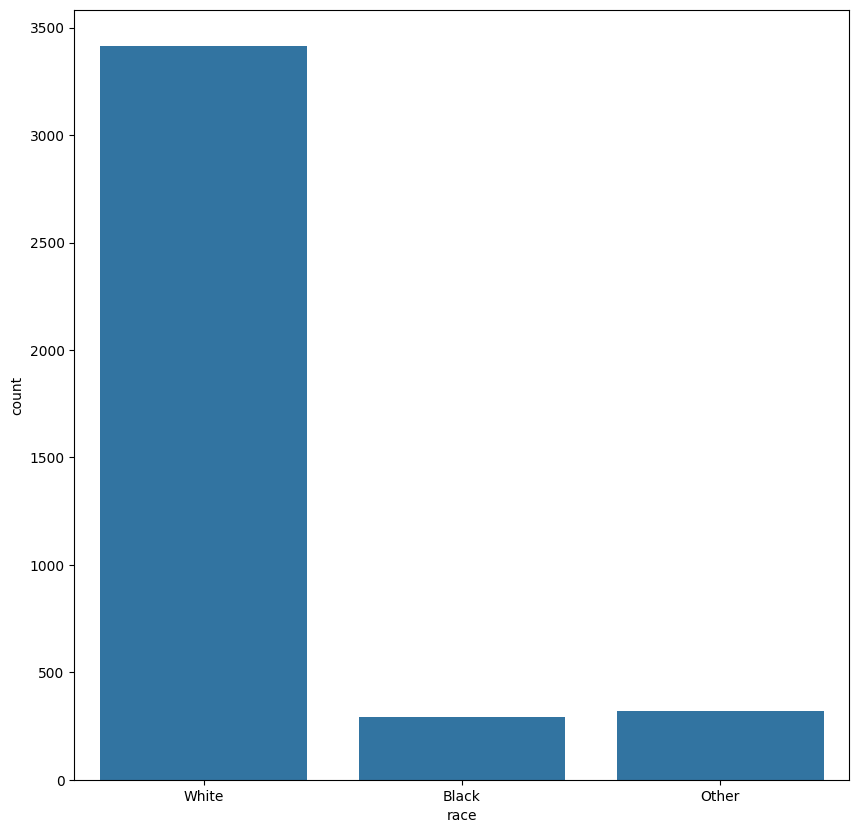

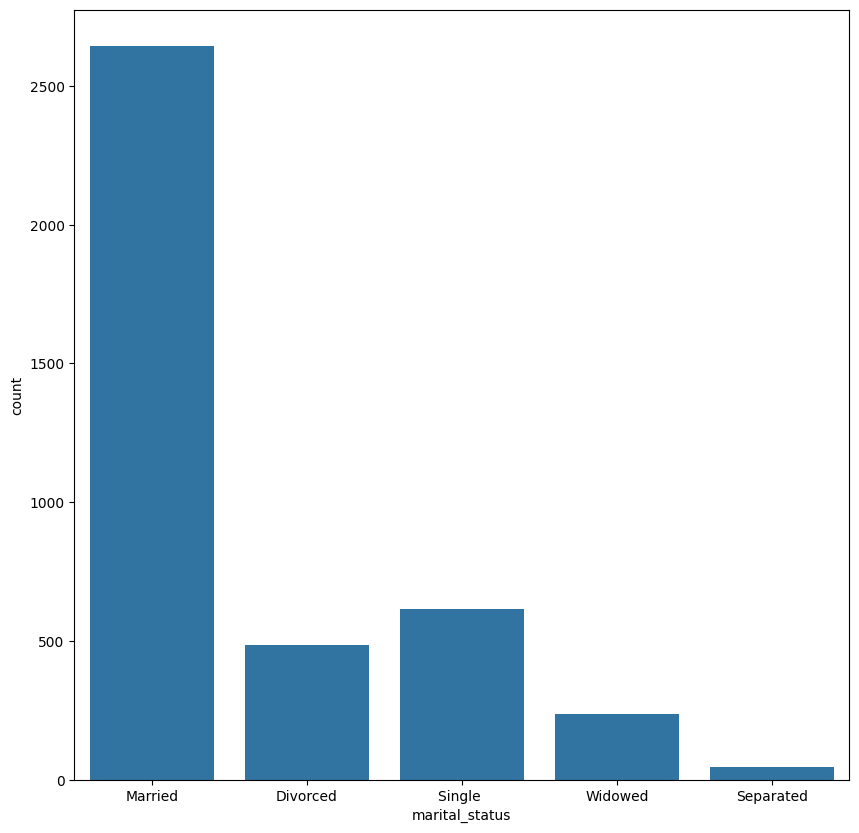

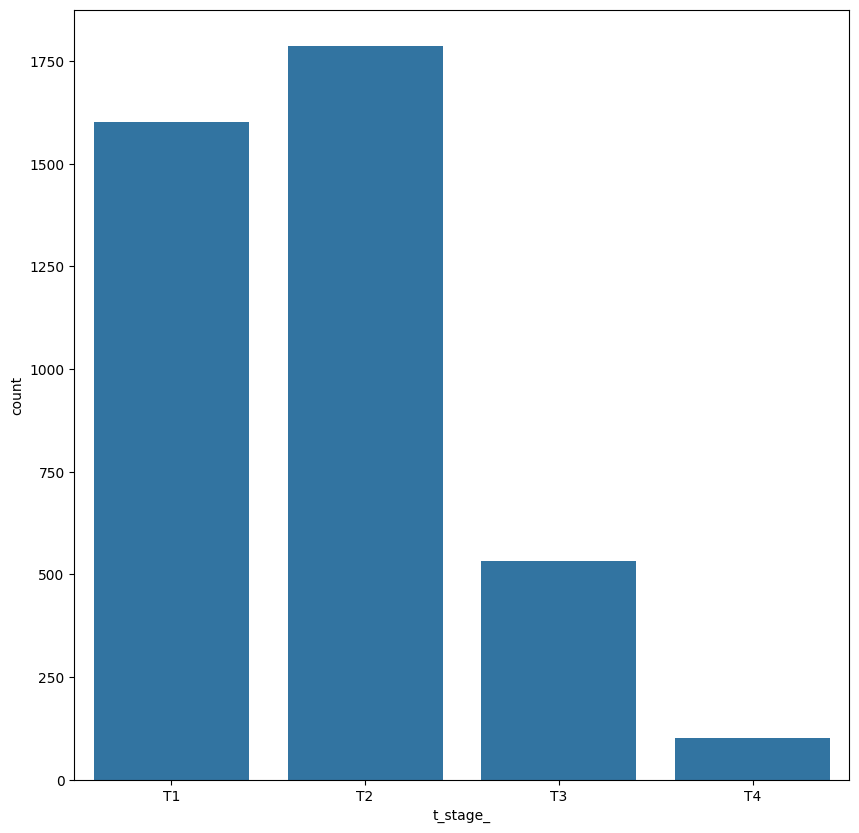

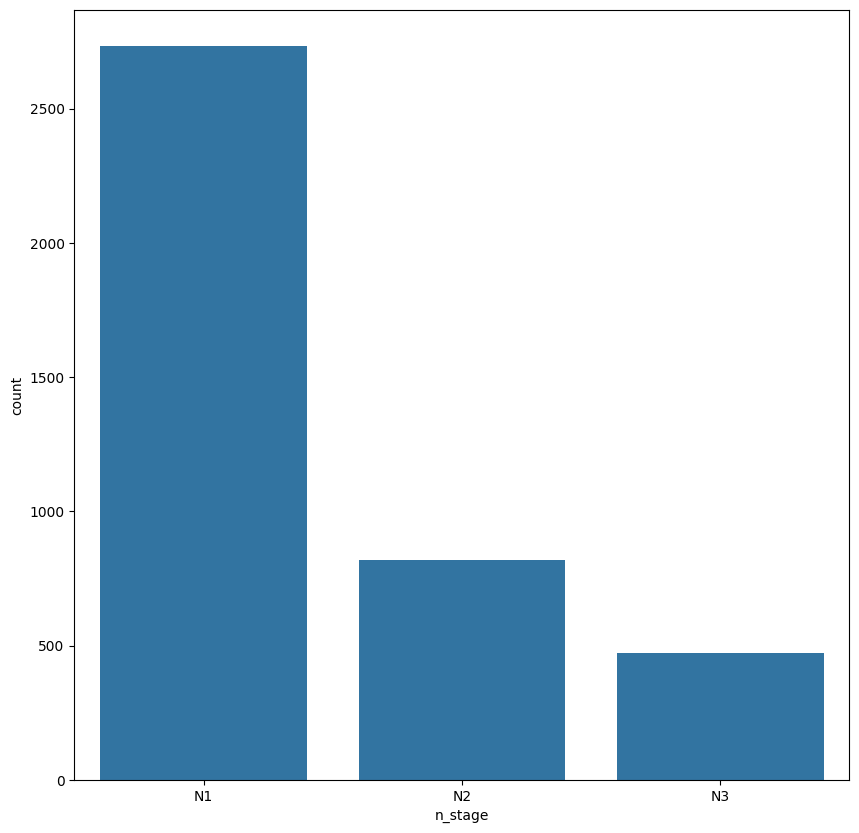

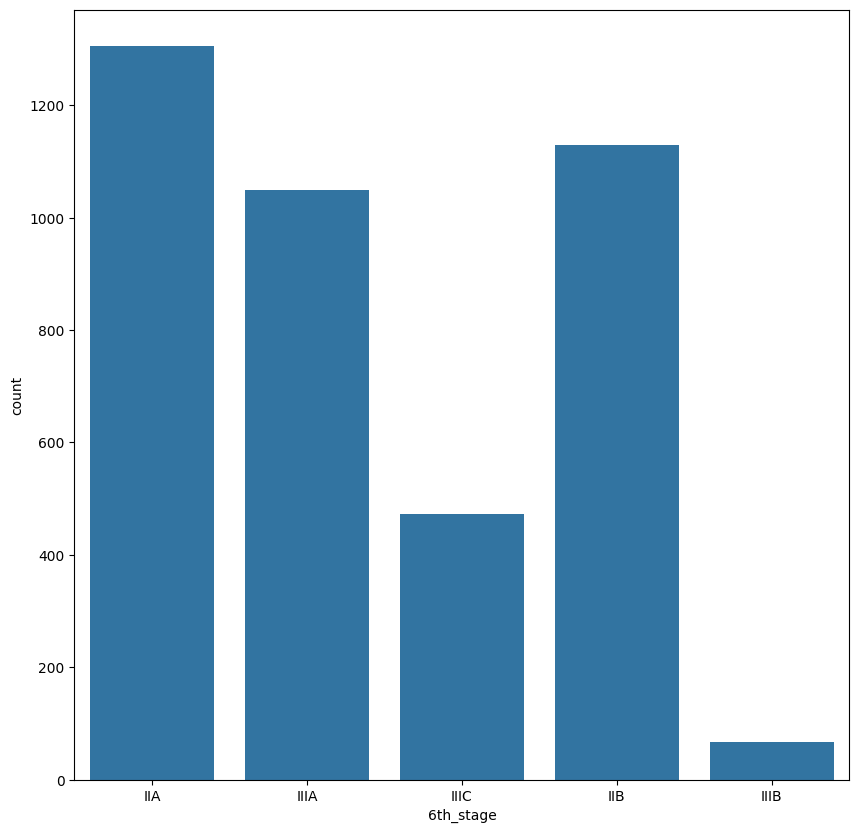

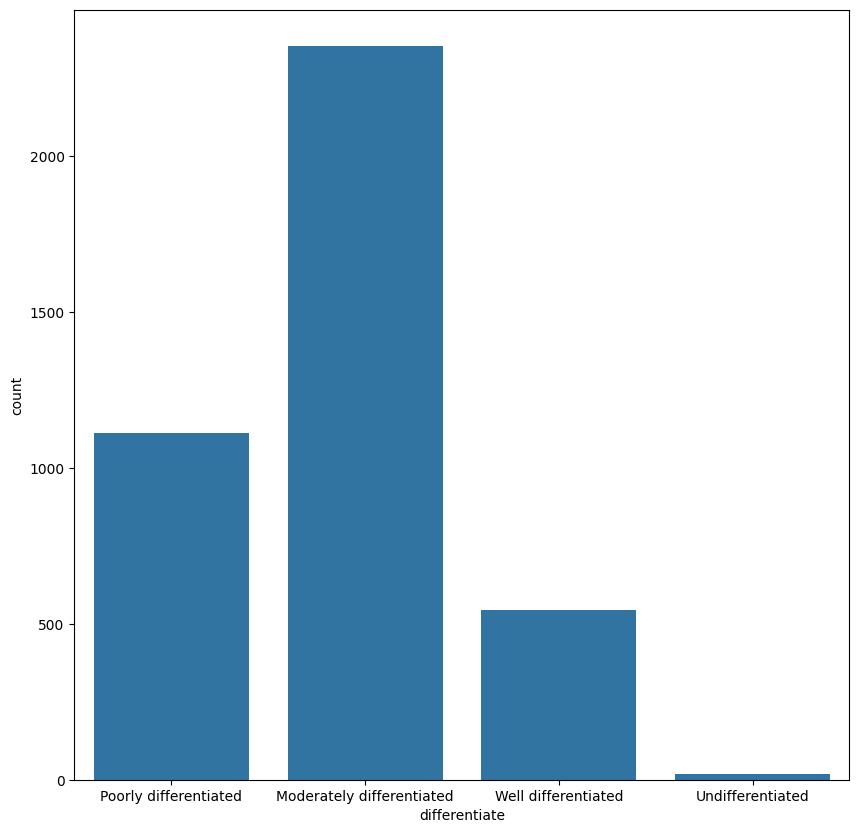

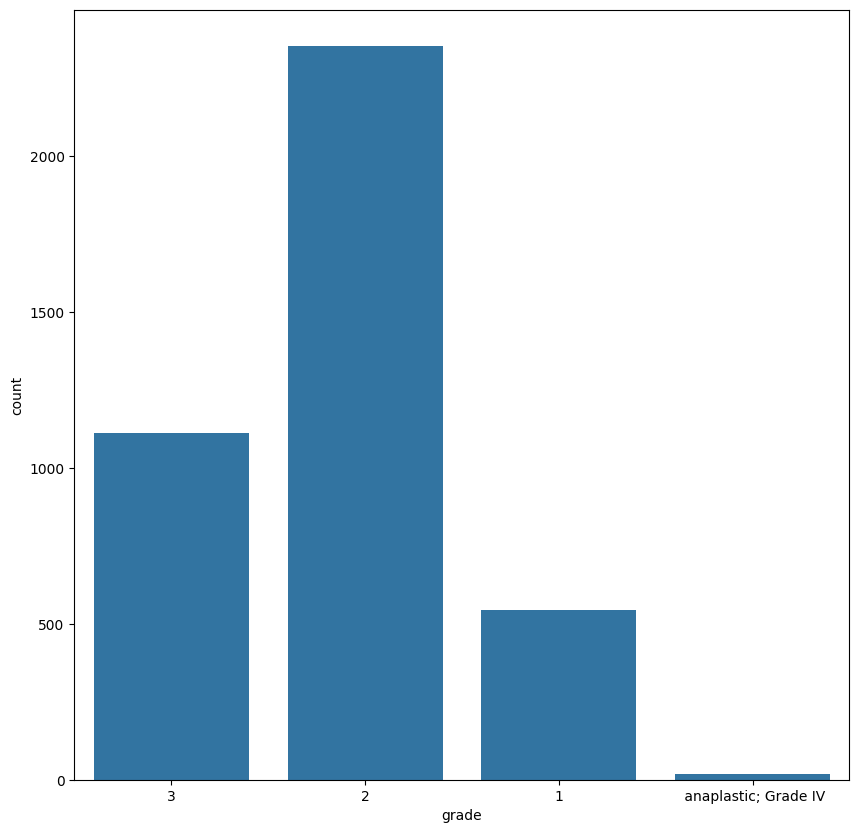

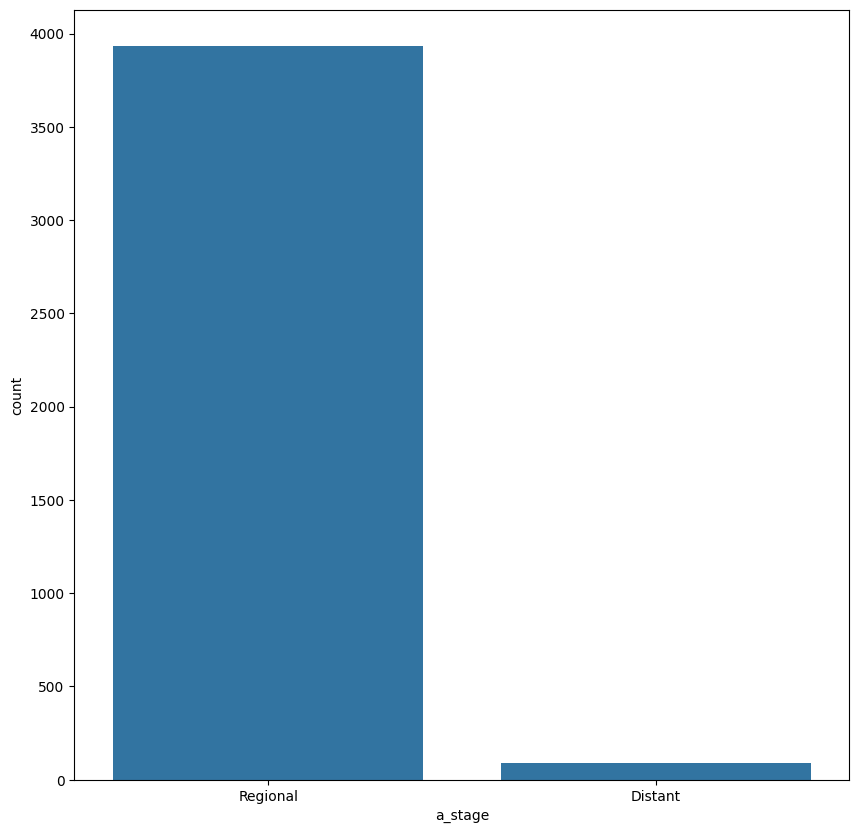

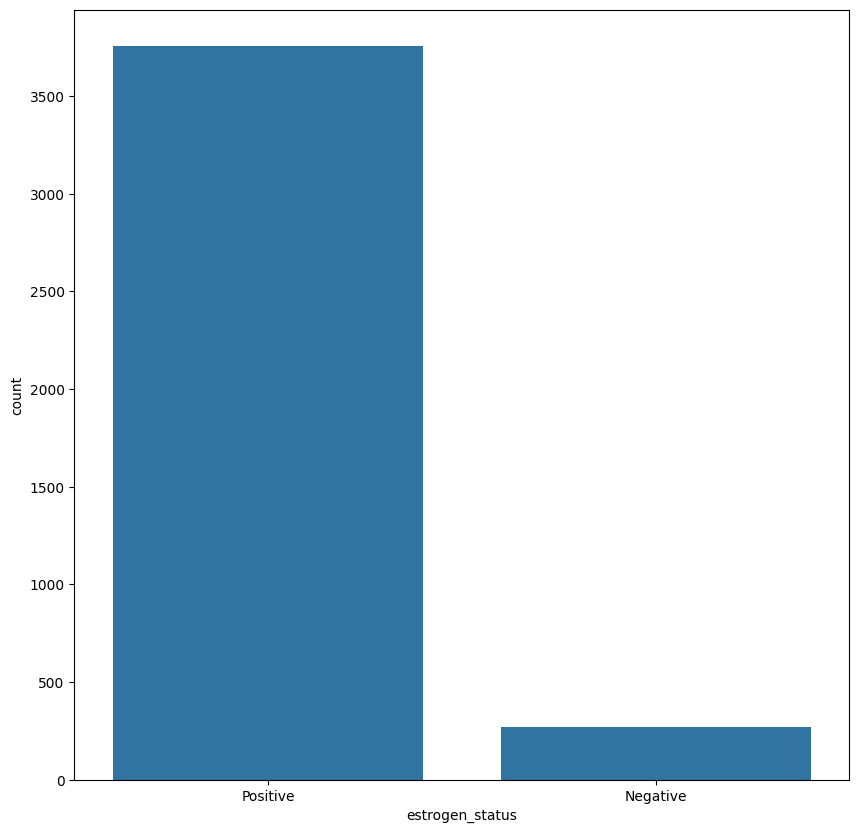

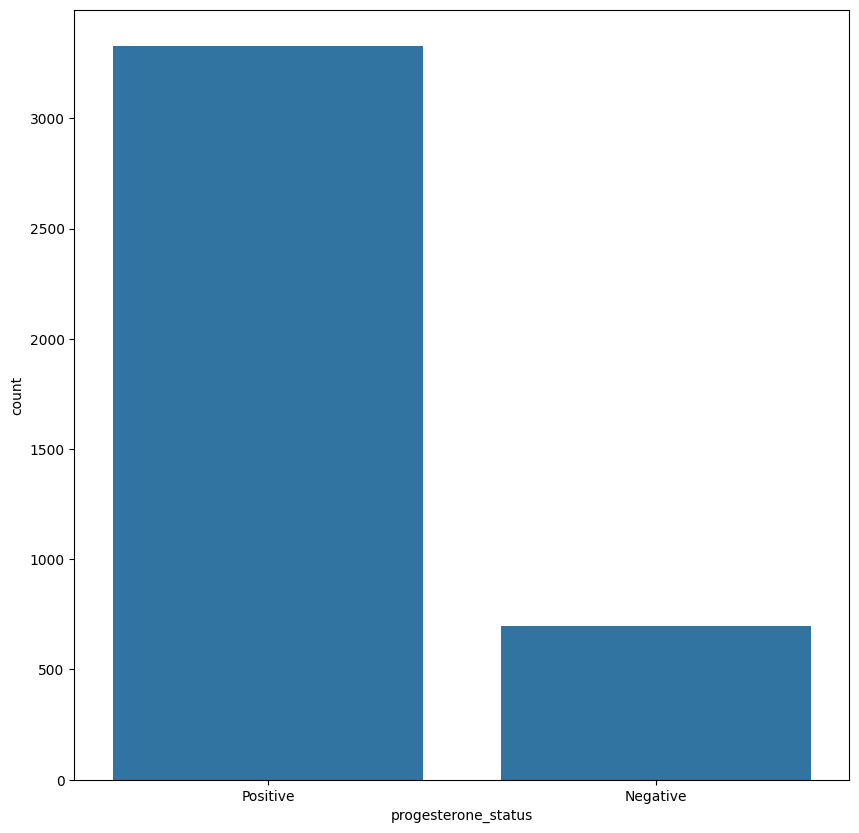

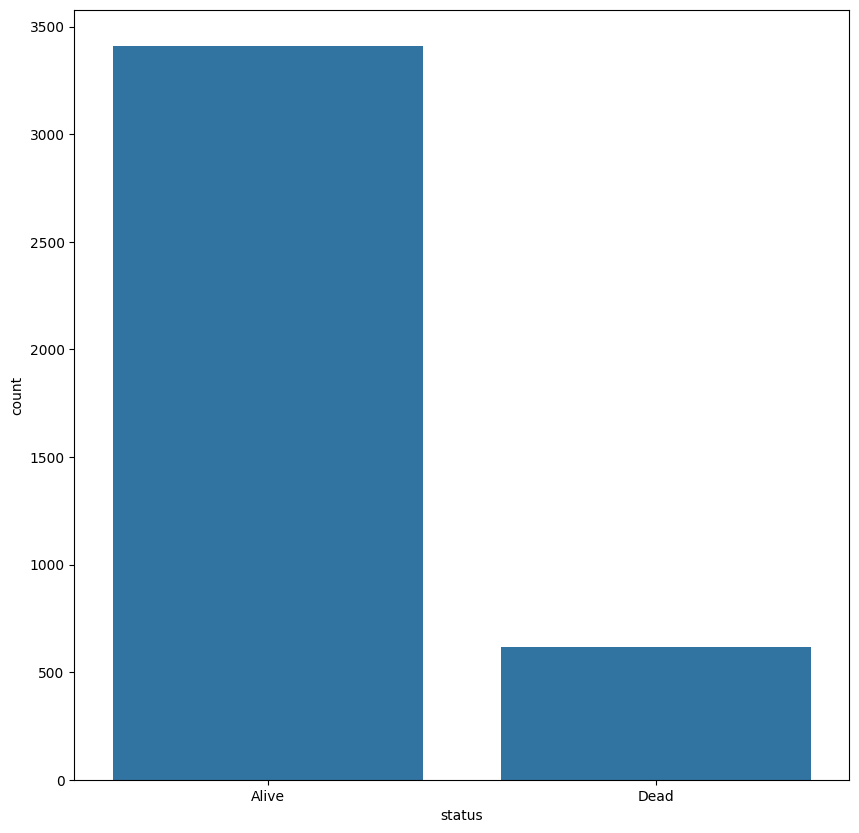

In [23]:
for i in cat_list:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i,data=df.loc[:,cat_list])

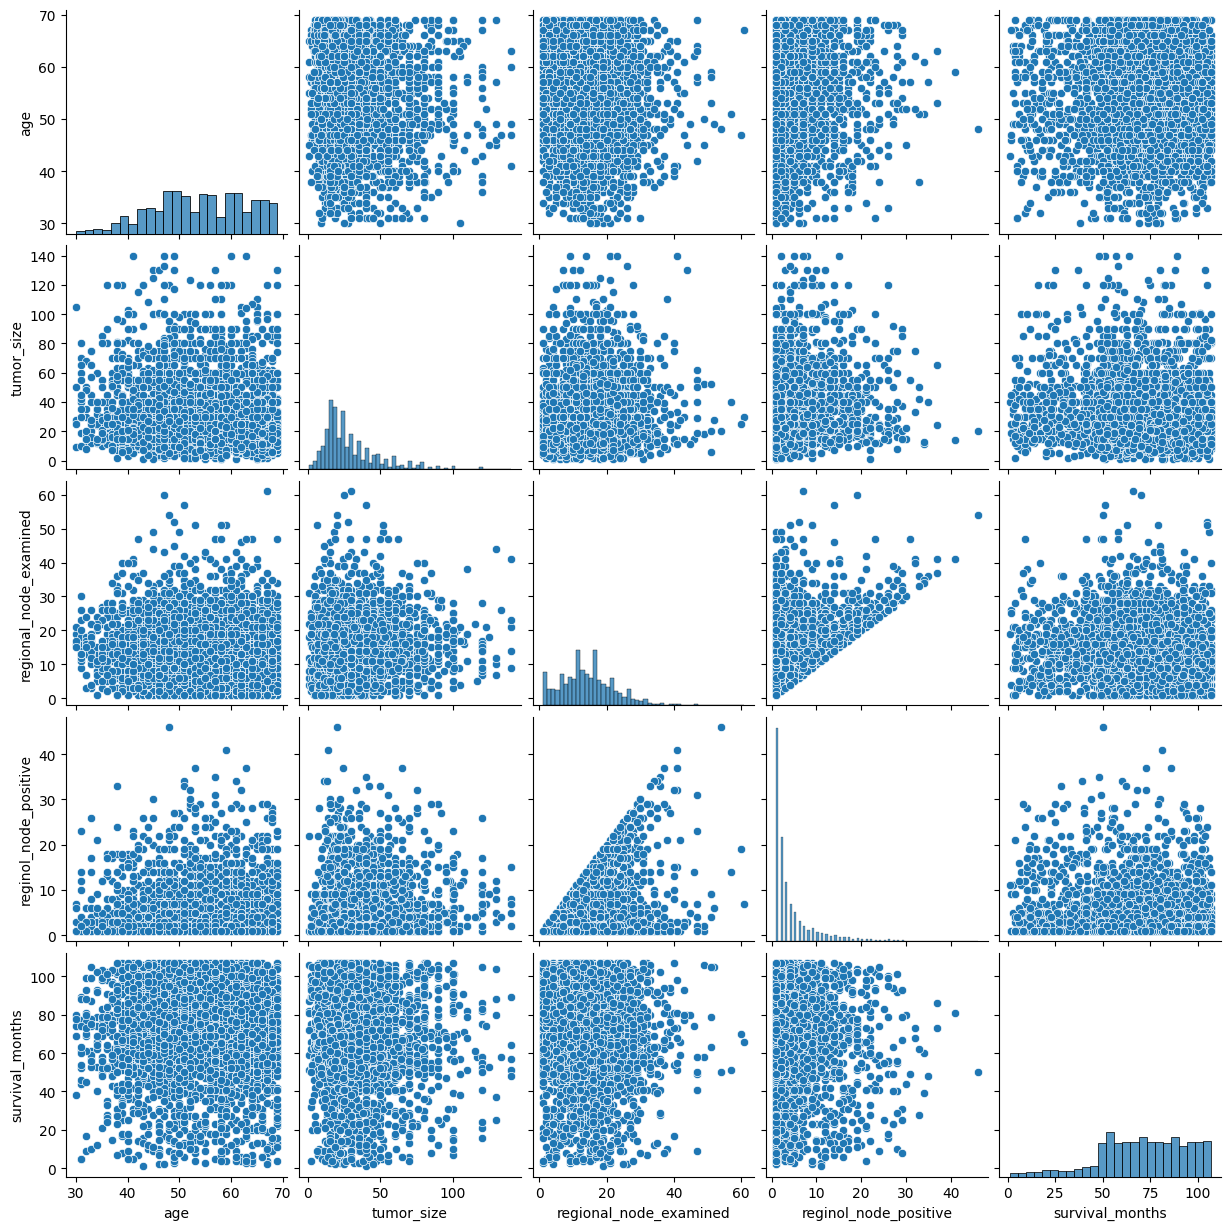

In [24]:
# numerical analysis
sns.pairplot(df.loc[:,num_list])

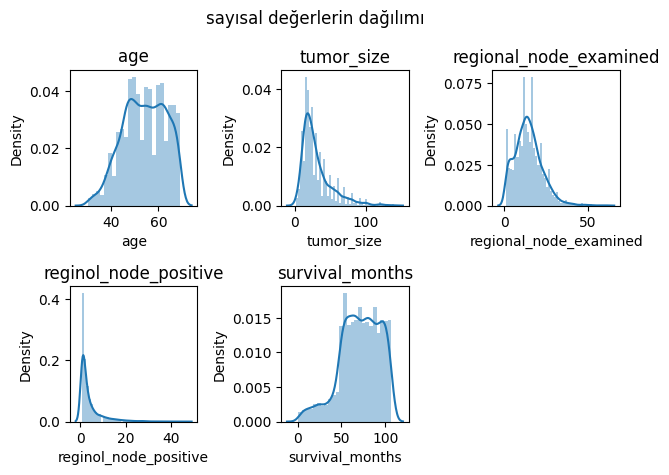

In [26]:
k=1
plt.suptitle("sayısal değerlerin dağılımı")

for i in num_list:
    plt.subplot(2,3,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1
    plt.tight_layout()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'tumor_size'}>],
       [<Axes: title={'center': 'regional_node_examined'}>,
        <Axes: title={'center': 'reginol_node_positive'}>],
       [<Axes: title={'center': 'survival_months'}>, <Axes: >]],
      dtype=object)

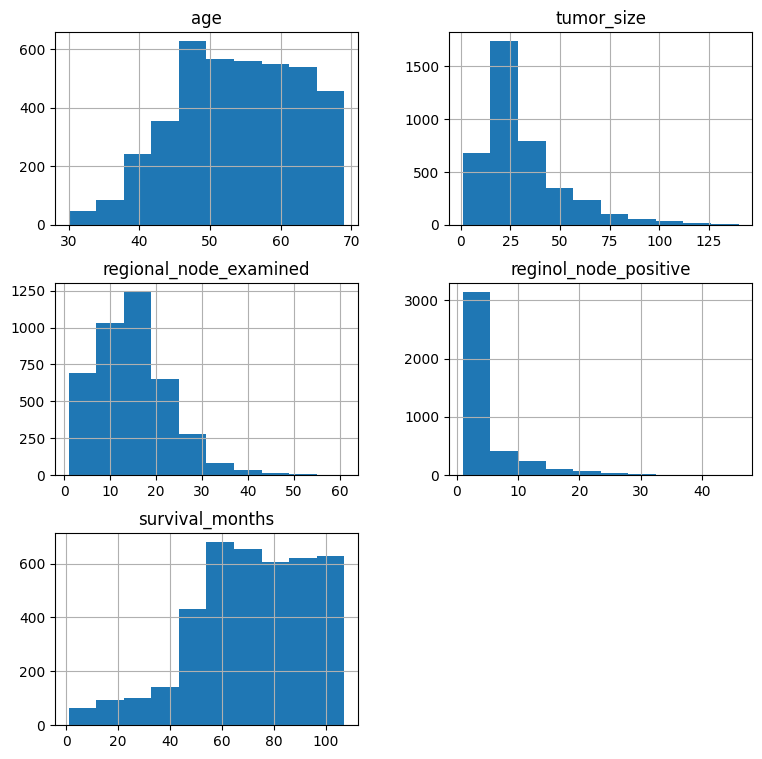

In [27]:
# histogram

df.hist(figsize=(9,9))

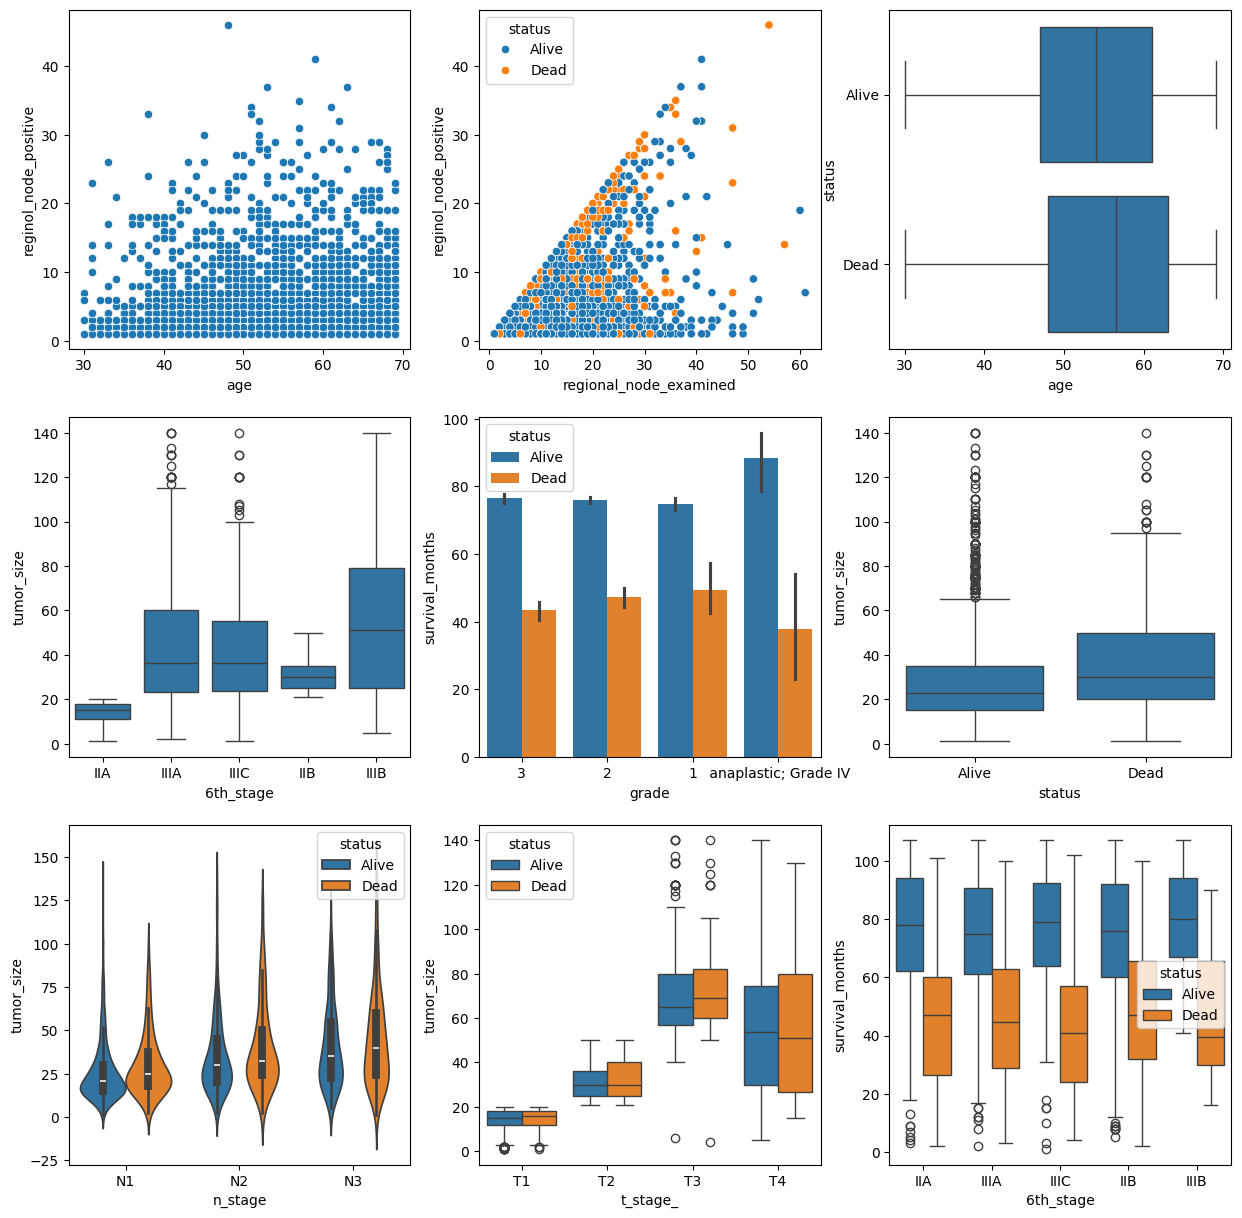

In [28]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x ='age',y ='reginol_node_positive',data = df)
plt.subplot(3,3,2)
sns.scatterplot(x="regional_node_examined",y="reginol_node_positive",hue="status",data=df)
plt.subplot(3,3,3)
sns.boxplot(x="age",y="status",data=df)
plt.subplot(3,3,4)
sns.boxplot(x="6th_stage",y="tumor_size",data=df)
plt.subplot(3,3,5)
sns.barplot(x="grade",y="survival_months",hue="status",data=df)
plt.subplot(3,3,6)
sns.boxplot(data=df, x="status", y="tumor_size")
plt.subplot(3,3,7)
sns.violinplot(x="n_stage",y="tumor_size",data=df,hue="status")
plt.subplot(3,3,8)
sns.boxplot(x="t_stage_",y="tumor_size",data=df,hue="status")
plt.subplot(3,3,9)
sns.boxplot(x="6th_stage",y="survival_months",hue="status",data=df)
plt.show()

**Data Preprocessing**

In [29]:
# missing values query

df.isna().sum()

,0
age,0
race,0
marital_status,0
t_stage_,0
n_stage,0
6th_stage,0
differentiate,0
grade,0
a_stage,0
tumor_size,0


In [30]:
#verisetimizde eksik değer yok

In [31]:
##Aykırı Değer Analizi

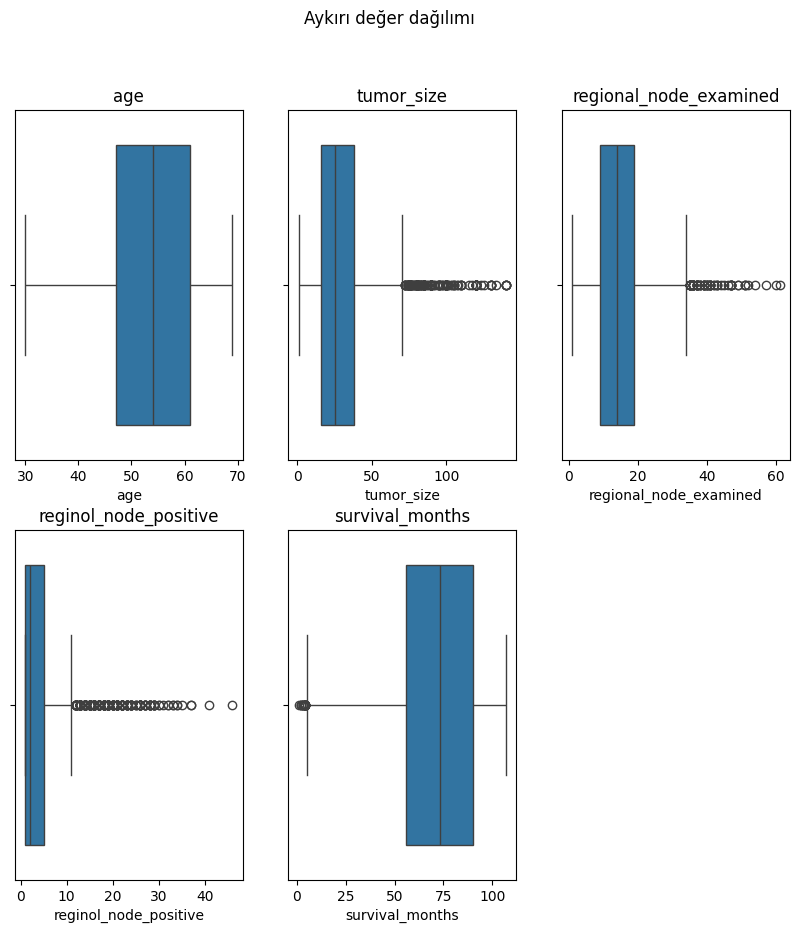

In [33]:
k=1
plt.figure(figsize=(10,10))
plt.suptitle("Aykırı değer dağılımı")

for i in df.loc[:,num_list]:
    plt.subplot(2,3,k)
    sns.boxplot(x = i, data = df.loc[:,num_list])
    plt.title(i)
    k+=1

In [34]:
# 3 değişkenimiz için aykırı değer problemi görünüyor.

In [35]:
df.describe([0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,10%,25%,35%,50%,65%,75%,90%,95%,max
age,4024.0,53.972167,8.963134,30.0,42.0,47.0,50.00,54.0,59.0,61.0,66.0,68.0,69.0
tumor_size,4024.0,30.473658,21.119696,1.0,12.0,16.0,19.05,25.0,30.0,38.0,60.0,75.0,140.0
regional_node_examined,4024.0,14.357107,8.099675,1.0,4.0,9.0,11.00,14.0,17.0,19.0,25.0,28.0,61.0
reginol_node_positive,4024.0,4.158052,5.109331,1.0,1.0,1.0,1.00,2.0,3.0,5.0,10.0,15.0,46.0
survival_months,4024.0,71.297962,22.921430,1.0,44.0,56.0,63.00,73.0,83.0,90.0,100.0,103.0,107.0


In [36]:
# verisetimizin bir kopyasını alıp aykırı değerleri giderelim

In [37]:
for i in df.loc[:,num_list]:
    Q1 = df[i].quantile(0.15)
    Q3 = df[i].quantile(0.85)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

age no
tumor_size yes
regional_node_examined yes
reginol_node_positive yes
survival_months no


In [38]:
df_out=df.copy()

In [39]:
for i in df_out.loc[:,num_list]:
    data_mean,data_std=df_out[i].mean(),df_out[i].std()
    cut_off=data_std*3
    lower,upper=data_mean-cut_off,data_mean+cut_off

    df_out.loc[df[i] > upper,i] = upper
    df_out.loc[df[i] < lower,i] = lower

In [41]:
df.describe([0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,10%,25%,35%,50%,65%,75%,90%,95%,max
age,4024.0,53.972167,8.963134,30.0,42.0,47.0,50.00,54.0,59.0,61.0,66.0,68.0,69.0
tumor_size,4024.0,30.473658,21.119696,1.0,12.0,16.0,19.05,25.0,30.0,38.0,60.0,75.0,140.0
regional_node_examined,4024.0,14.357107,8.099675,1.0,4.0,9.0,11.00,14.0,17.0,19.0,25.0,28.0,61.0
reginol_node_positive,4024.0,4.158052,5.109331,1.0,1.0,1.0,1.00,2.0,3.0,5.0,10.0,15.0,46.0
survival_months,4024.0,71.297962,22.921430,1.0,44.0,56.0,63.00,73.0,83.0,90.0,100.0,103.0,107.0


In [42]:
df_out.describe([0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,10%,25%,35%,50%,65%,75%,90%,95%,max
age,4024.0,53.972167,8.963134,30.000000,42.0,47.0,50.00,54.0,59.0,61.0,66.0,68.0,69.000000
tumor_size,4024.0,30.155555,19.923542,1.000000,12.0,16.0,19.05,25.0,30.0,38.0,60.0,75.0,93.832746
regional_node_examined,4024.0,14.292471,7.855150,1.000000,4.0,9.0,11.00,14.0,17.0,19.0,25.0,28.0,38.656132
reginol_node_positive,4024.0,4.012696,4.493537,1.000000,1.0,1.0,1.00,2.0,3.0,5.0,10.0,15.0,19.486045
survival_months,4024.0,71.298741,22.919074,2.533674,44.0,56.0,63.00,73.0,83.0,90.0,100.0,103.0,107.000000


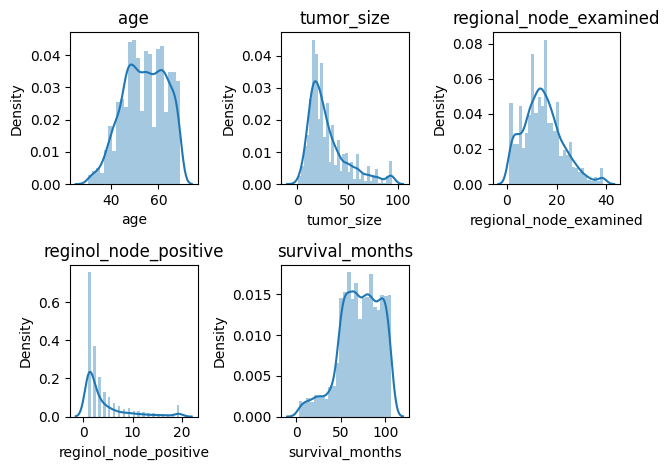

In [43]:
k=1

for i in df_out.loc[:,num_list]:
    plt.subplot(2,3,k)
    sns.distplot(df_out[i])
    plt.title(i)
    k+=1
    plt.tight_layout()

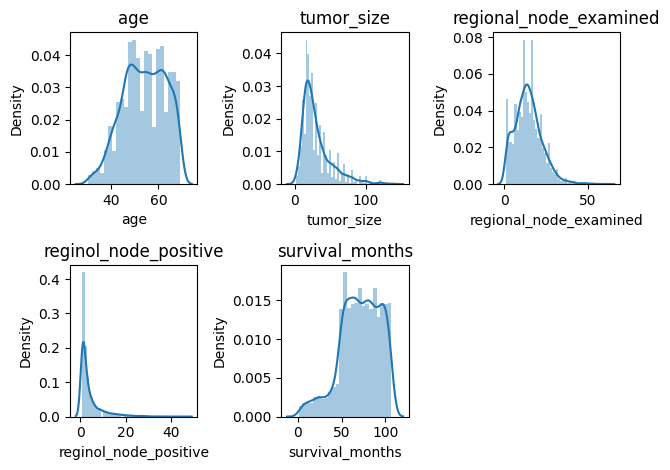

In [44]:
k=1

for i in df.loc[:,num_list]:
    plt.subplot(2,3,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1
    plt.tight_layout()

In [45]:
# aykırı değerler giderildikten sonra dağılımdaki değişikliği görebiliriz.

In [47]:
### Encoding

In [48]:
for i in df.select_dtypes("object"):
    print(df[i].value_counts())

race
White    3413
Other     320
Black     291
Name: count, dtype: int64
marital_status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64
t_stage_
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64
n_stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64
6th_stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64
differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64
grade
2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: count, dtype: int64
a_stage
Regional    3932
Distant       92
Name: count, dtype: int64
estrogen_status
Positive    3755
Negative     269
Name: count, dtype: int64
progesterone_status
Positive    3326
Negative     698
Name: count, dtype: int

In [49]:
df.select_dtypes("object").head()

,race,marital_status,t_stage_,n_stage,6th_stage,differentiate,grade,a_stage,estrogen_status,progesterone_status,status
0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
1,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
2,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,Alive
3,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
4,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,Alive


In [50]:
for i in cat_list:
    df[i] = df[i].factorize()[0]

In [51]:
df.head()

,age,race,marital_status,t_stage_,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,reginol_node_positive,survival_months,status
0,68,0,0,0,0,0,0,0,0,4,0,0,24,1,60,0
1,50,0,0,1,1,1,1,1,0,35,0,0,14,5,62,0
2,58,0,1,2,2,2,1,1,0,63,0,0,14,7,75,0
3,58,0,0,0,0,0,0,0,0,18,0,0,2,1,84,0
4,47,0,0,1,0,3,0,0,0,41,0,0,3,1,50,0


In [52]:
for i in cat_list:
    df_out[i] = df_out[i].factorize()[0]

In [53]:
df_out.head()

,age,race,marital_status,t_stage_,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,reginol_node_positive,survival_months,status
0,68.0,0,0,0,0,0,0,0,0,4.0,0,0,24.0,1.0,60.0,0
1,50.0,0,0,1,1,1,1,1,0,35.0,0,0,14.0,5.0,62.0,0
2,58.0,0,1,2,2,2,1,1,0,63.0,0,0,14.0,7.0,75.0,0
3,58.0,0,0,0,0,0,0,0,0,18.0,0,0,2.0,1.0,84.0,0
4,47.0,0,0,1,0,3,0,0,0,41.0,0,0,3.0,1.0,50.0,0


In [ ]:
## Corelation Analysis

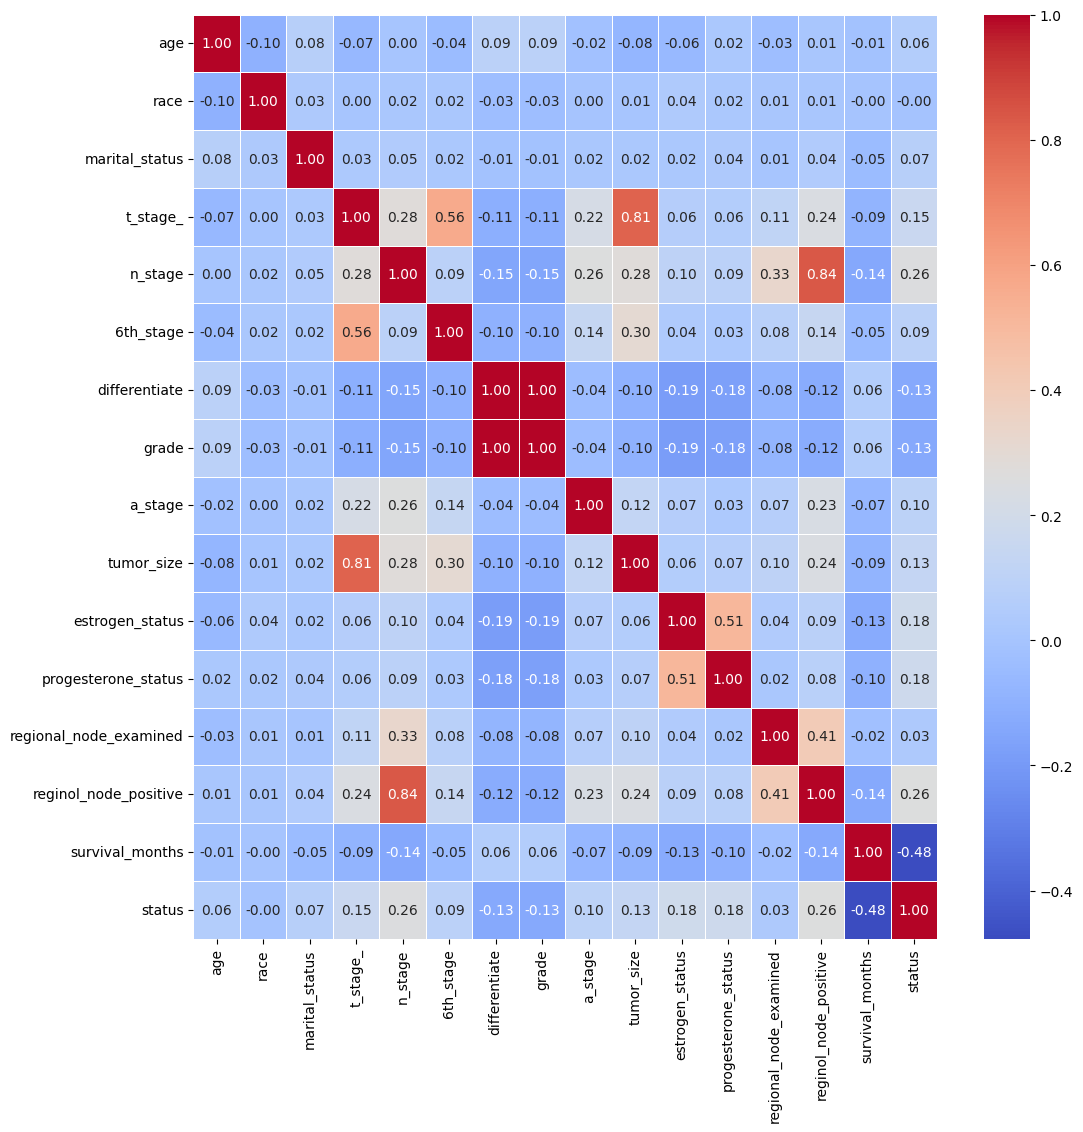

In [54]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),linewidths=0.6,cmap="coolwarm",fmt=".2f",annot=True);

In [55]:
#korelasyon ilişkileri yüksek olan öznitelikleri çıkartalım

In [56]:
cor=df.corr()["status"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with a":cor.values})

,column,Correlation with a
0,status,1.000000
1,reginol_node_positive,0.256638
2,n_stage,0.255772
3,estrogen_status,0.184650
4,progesterone_status,0.177079
5,t_stage_,0.154699
6,tumor_size,0.134205
7,a_stage,0.096584
8,6th_stage,0.091873
9,marital_status,0.073050


In [57]:
df.drop("grade",axis=1,inplace=True)
df_out.drop("grade",axis=1,inplace=True)

**Modelling**

In [58]:
X=df.drop("status",axis=1)
y=df["status"]

In [59]:
# train-test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3)

In [60]:
X_train.shape

(3018, 14)

In [61]:
y_test.shape

(1006,)

In [62]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.6 MB/s eta 0:00:00


In [63]:
!pip install lightgbm

In [64]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [65]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [66]:
log=LogisticRegression().fit(X_train,y_train)
naiv=BernoulliNB().fit(X_train,y_train)
knn=KNeighborsClassifier().fit(X_train,y_train)
ada=AdaBoostClassifier().fit(X_train,y_train)
svm=SVC().fit(X_train,y_train)
mlpc=MLPClassifier().fit(X_train,y_train)
dtc=DecisionTreeClassifier().fit(X_train,y_train)
rf=RandomForestClassifier().fit(X_train,y_train)
xgb=XGBClassifier().fit(X_train,y_train)
gbm=GradientBoostingClassifier().fit(X_train,y_train)
lgb=LGBMClassifier().fit(X_train,y_train)
catbost=CatBoostClassifier().fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 468, number of negative: 2550
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 3018, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155070 -> initscore=-1.695380
[LightGBM] [Info] Start training from score -1.695380
Learning rate set to 0.016511
0:	learn: 0.6771412	total: 55.9ms	remaining: 55.9s
1:	learn: 0.6606052	total: 66.2ms	remaining: 33s
2:	learn: 0.6450306	total: 69.8ms	remaining: 23.2s
3:	learn: 0.6297393	total: 85ms	remaining: 21.2s
4:	learn: 0.6148544	total: 88ms	remaining: 17.5s
5:	learn: 0.6008311	total: 94.1ms	remaining: 15.6s
6:	learn: 0.5878776	total: 101ms	remaining: 14.3s
7:	learn: 0.5751842	total: 103ms	remaining: 12.8s
8:	learn: 0.56343

In [68]:
models=[log,naiv,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

In [69]:
def ML(y,models):

    y_pred=models.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1score=f1_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,recall,f1score,precision

In [70]:
for i in models:

    print(i,"Algorithm succed rate :",ML("status",i))

LogisticRegression() Algorithm succed rate : (0.8986083499005965, 0.40540540540540543, 0.5405405405405406, 0.8108108108108109)
BernoulliNB() Algorithm succed rate : (0.8330019880715706, 0.1891891891891892, 0.25, 0.3684210526315789)
KNeighborsClassifier() Algorithm succed rate : (0.8936381709741551, 0.3918918918918919, 0.5201793721973095, 0.7733333333333333)
AdaBoostClassifier() Algorithm succed rate : (0.8976143141153081, 0.4797297297297297, 0.5795918367346938, 0.7319587628865979)
SVC() Algorithm succed rate : (0.8926441351888668, 0.35135135135135137, 0.49056603773584906, 0.8125)
MLPClassifier() Algorithm succed rate : (0.8936381709741551, 0.5337837837837838, 0.5962264150943397, 0.6752136752136753)
DecisionTreeClassifier() Algorithm succed rate : (0.8220675944333996, 0.5, 0.4525993883792049, 0.4134078212290503)
RandomForestClassifier() Algorithm succed rate : (0.9025844930417495, 0.42567567567567566, 0.5625, 0.8289473684210527)
XGBClassifier(base_score=None, booster=None, callbacks=Non

In [71]:
# aykırı değerleri giderilmiş modelimiz için gözlemleyelim

In [72]:
X2=df_out.drop("status",axis=1)
y2=df_out["status"]

In [73]:
# train-test split

X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.25,random_state=3)

In [74]:
log2=LogisticRegression().fit(X_train2,y_train2)
naiv2=BernoulliNB().fit(X_train2,y_train2)
knn2=KNeighborsClassifier().fit(X_train2,y_train2)
ada2=AdaBoostClassifier().fit(X_train2,y_train2)
svm2=SVC().fit(X_train2,y_train2)
mlpc2=MLPClassifier().fit(X_train2,y_train2)
dtc2=DecisionTreeClassifier().fit(X_train2,y_train2)
rf2=RandomForestClassifier().fit(X_train2,y_train2)
xgb2=XGBClassifier().fit(X_train2,y_train2)
gbm2=GradientBoostingClassifier().fit(X_train2,y_train2)
lgb2=LGBMClassifier().fit(X_train2,y_train2)
catbost2=CatBoostClassifier().fit(X_train2,y_train2)

[LightGBM] [Info] Number of positive: 468, number of negative: 2550
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 3018, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155070 -> initscore=-1.695380
[LightGBM] [Info] Start training from score -1.695380
Learning rate set to 0.016511
0:	learn: 0.6769825	total: 3.3ms	remaining: 3.29s
1:	learn: 0.6602510	total: 5.15ms	remaining: 2.57s
2:	learn: 0.6442828	total: 6.95ms	remaining: 2.31s
3:	learn: 0.6290510	total: 9.32ms	remaining: 2.32s
4:	learn: 0.6142768	total: 11.2ms	remaining: 2.23s
5:	learn: 0.6002569	total: 13ms	remaining: 2.15s
6:	learn: 0.5866788	total: 14.7ms	remaining: 2.09s
7:	learn: 0.5741001	total: 16.4ms	remaining: 2.03s
8:	learn: 0.

In [75]:
models=[log2,naiv2,knn2,ada2,svm2,mlpc2,dtc2,rf2,xgb2,gbm2,lgb2,catbost2]

In [76]:
def ML(y,models):

    y_pred=models.predict(X_test)
    accuracy=accuracy_score(y_test2,y_pred)
    recall=recall_score(y_test2,y_pred)
    f1score=f1_score(y_test2,y_pred)
    precision=precision_score(y_test2,y_pred)

    return accuracy,recall,f1score,precision

In [77]:
for i in models:

    print(i,"Algorithm succed rate :",ML("status",i))

LogisticRegression() Algorithm succed rate : (0.8946322067594433, 0.39864864864864863, 0.5267857142857143, 0.7763157894736842)
BernoulliNB() Algorithm succed rate : (0.8330019880715706, 0.1891891891891892, 0.25, 0.3684210526315789)
KNeighborsClassifier() Algorithm succed rate : (0.8906560636182903, 0.3918918918918919, 0.5132743362831859, 0.7435897435897436)
AdaBoostClassifier() Algorithm succed rate : (0.8966202783300199, 0.46621621621621623, 0.5702479338842975, 0.7340425531914894)
SVC() Algorithm succed rate : (0.8936381709741551, 0.3581081081081081, 0.49765258215962443, 0.8153846153846154)
MLPClassifier() Algorithm succed rate : (0.8986083499005965, 0.40540540540540543, 0.5405405405405406, 0.8108108108108109)
DecisionTreeClassifier() Algorithm succed rate : (0.81610337972167, 0.47297297297297297, 0.4307692307692308, 0.3954802259887006)
RandomForestClassifier() Algorithm succed rate : (0.9005964214711729, 0.43243243243243246, 0.5614035087719298, 0.8)
XGBClassifier(base_score=None, boo

In [79]:
# aykırı değerler giderilince genel olarak performans düştü ,ilk modelimiz üzerinden gidelim

In [80]:
# verileri ölçekleyerek devam edelim

In [81]:
# model3

In [82]:
X=df.drop("status",axis=1)
y=df["status"]

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
min_max=MinMaxScaler()
X=min_max.fit_transform(X)

In [85]:
# train-test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3)

In [86]:
log3=LogisticRegression().fit(X_train,y_train)
naiv3=BernoulliNB().fit(X_train,y_train)
knn3=KNeighborsClassifier().fit(X_train,y_train)
ada3=AdaBoostClassifier().fit(X_train,y_train)
svm3=SVC().fit(X_train,y_train)
mlpc3=MLPClassifier().fit(X_train,y_train)
dtc3=DecisionTreeClassifier().fit(X_train,y_train)
rf3=RandomForestClassifier().fit(X_train,y_train)
xgb3=XGBClassifier().fit(X_train,y_train)
gbm3=GradientBoostingClassifier().fit(X_train,y_train)
lgb3=LGBMClassifier().fit(X_train,y_train)
catbost3=CatBoostClassifier().fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 468, number of negative: 2550
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 339
[LightGBM] [Info] Number of data points in the train set: 3018, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155070 -> initscore=-1.695380
[LightGBM] [Info] Start training from score -1.695380
Learning rate set to 0.016511
0:	learn: 0.6771412	total: 1.97ms	remaining: 1.97s
1:	learn: 0.6606052	total: 4.11ms	remaining: 2.05s
2:	learn: 0.6450306	total: 6.17ms	remaining: 2.05s
3:	learn: 0.6297393	total: 8.35ms	remaining: 2.08s
4:	learn: 0.6148544	total: 10.4ms	remaining: 2.07s
5:	learn: 0.6008311	total: 12.5ms	remaining: 2.07s
6:	learn: 0.5878776	total: 14.4ms	remaining: 2.04s
7:	learn: 0.5751842	total: 16.4ms	remaining: 2.03s
8:	learn:

In [87]:
models=[log3,naiv3,knn3,ada3,svm3,mlpc3,dtc3,rf3,xgb3,gbm3,lgb3,catbost3]

In [88]:
def ML(y,models):

    y_pred=models.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1score=f1_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,recall,f1score,precision

In [89]:
for i in models:

    print(i,"Algorithm succed rate :",ML("status",i))

LogisticRegression() Algorithm succed rate : (0.8996023856858847, 0.40540540540540543, 0.5429864253393665, 0.821917808219178)
BernoulliNB() Algorithm succed rate : (0.8280318091451292, 0.27702702702702703, 0.3215686274509804, 0.38317757009345793)
KNeighborsClassifier() Algorithm succed rate : (0.878727634194831, 0.33783783783783783, 0.4504504504504504, 0.6756756756756757)
AdaBoostClassifier() Algorithm succed rate : (0.8976143141153081, 0.4797297297297297, 0.5795918367346938, 0.7319587628865979)
SVC() Algorithm succed rate : (0.8946322067594433, 0.33783783783783783, 0.4854368932038835, 0.8620689655172413)
MLPClassifier() Algorithm succed rate : (0.8976143141153081, 0.43243243243243246, 0.5541125541125541, 0.7710843373493976)
DecisionTreeClassifier() Algorithm succed rate : (0.820079522862823, 0.47297297297297297, 0.4361370716510904, 0.4046242774566474)
RandomForestClassifier() Algorithm succed rate : (0.9025844930417495, 0.43243243243243246, 0.5663716814159292, 0.8205128205128205)
XGBC

In [90]:
# 3 farklı model oluşturup sonuçları gözlemledik